In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,auc
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,roc_curve,plot_roc_curve
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")
import pickle
import json

# Problem Statement :

# Data Gathering :

In [85]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### 1.PassengerId :

In [5]:
df["PassengerId"].nunique()

891

#### 2.Pclass :

In [6]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [7]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 3.Gender :

In [8]:
df["Gender"].unique()

array(['male', 'female'], dtype=object)

In [9]:
df["Gender"].value_counts()

male      577
female    314
Name: Gender, dtype: int64

#### 4.Age

In [10]:
df["Age"].isna().sum()

177

<AxesSubplot:>

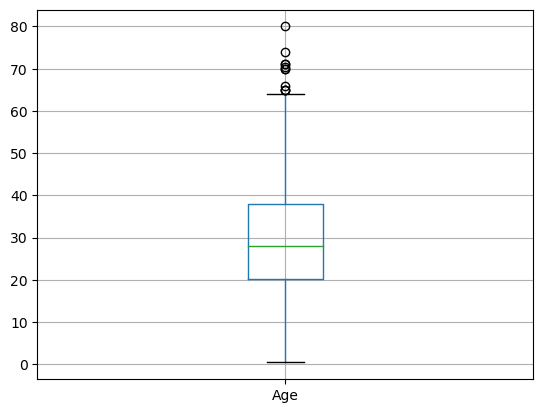

In [11]:
df[["Age"]].boxplot()

#### 5.SibSp :

In [12]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### 6.Parch

In [14]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [15]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### 7.Ticket

In [16]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [17]:
df["Ticket"].nunique()

681

In [18]:
df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [19]:
df["Ticket"].isna().sum()

0

#### 8.Fare :

In [20]:
df["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [21]:
df["Fare"].nunique()

248

In [22]:
df["Fare"].isna().sum()

0

#### 9.Embarked :

In [23]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
df["Embarked"].isna().sum()

2

#### 10.Name :

In [26]:
df["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [27]:
df["Name"].nunique()

891

# Feature Engineering :

### Gender :

In [28]:
df["Gender"].value_counts().to_dict()

{'male': 577, 'female': 314}

In [29]:
gender_values = {'male': 1, 'female': 0}

df["Gender"].replace({'male': 1, 'female': 0},inplace=True)

### Embarked :

In [30]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

### Ticket :

In [31]:
count = df["Ticket"].value_counts()
thresh = 1

ticket = count[count==1].index
df["Ticket"] = df["Ticket"].replace(ticket,"unique_ticket")

In [32]:
df = pd.get_dummies(df,columns=["Ticket","Embarked"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 148 entries, PassengerId to Embarked_S
dtypes: float64(2), int64(6), object(2), uint8(138)
memory usage: 189.8+ KB


### Age :

In [35]:
# imputing missing value by KNN imputer

knn_imputer = KNNImputer(n_neighbors=3)
array = knn_imputer.fit_transform(df)
df1 = pd.DataFrame(array,columns=df.columns)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 146 entries, PassengerId to Embarked_S
dtypes: float64(146)
memory usage: 1016.4 KB


In [36]:
df1

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,...,Ticket_S.O.C. 14879,Ticket_SC/Paris 2123,Ticket_STON/O2. 3101279,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_WE/P 5735,Ticket_unique_ticket,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,889.0,0.0,3.0,0.0,28.0,1.0,2.0,23.4500,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [37]:
df1.isna().sum()

PassengerId             0
Survived                0
Pclass                  0
Gender                  0
Age                     0
                       ..
Ticket_WE/P 5735        0
Ticket_unique_ticket    0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Length: 146, dtype: int64

# Feature Selection :

In [34]:
df.drop(["Cabin","Name"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 146 entries, PassengerId to Embarked_S
dtypes: float64(2), int64(6), uint8(138)
memory usage: 175.9 KB


# Model Building And Training :

### Train test split :

In [39]:
x = df1.drop("Survived",axis=1)
y = df1["Survived"]

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

print("x_train_shape :",x_train.shape)
print("x_test_shape :",x_test.shape)
print("y_train_shape :",y_train.shape)
print("y_test_shape :",y_test.shape)

x_train_shape : (712, 145)
x_test_shape : (179, 145)
y_train_shape : (712,)
y_test_shape : (179,)


### model building :

In [41]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

# Evlaution of Model :

In [43]:
# for testing evalution
y_pred_test = logistic_model.predict(x_test)

cnf_mtrx = confusion_matrix(y_test,y_pred_test)
print("confusion matrix :")
print(cnf_mtrx)
print("*"*60)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy is :",accuracy)
print("*"*60)

clf_report = classification_report(y_test,y_pred_test)
print("classification report is:")
print(clf_report)

confusion matrix :
[[98 12]
 [21 48]]
************************************************************
accuracy is : 0.8156424581005587
************************************************************
classification report is:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       110
         1.0       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



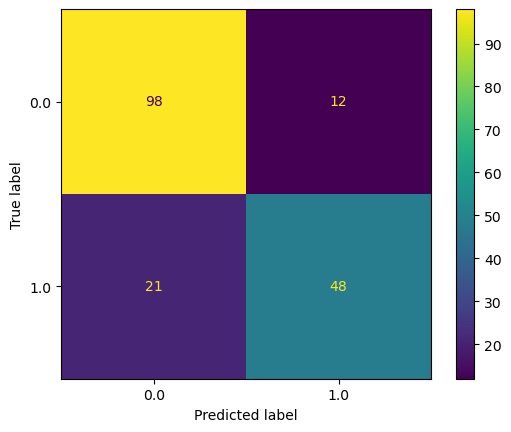

In [46]:
plot_confusion_matrix(logistic_model,x_test,y_test)
plt.show()

In [47]:
# for training evalution
y_pred_train = logistic_model.predict(x_train)

cnf_mtrx = confusion_matrix(y_train,y_pred_train)
print("confusion matrix :")
print(cnf_mtrx)
print("*"*60)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy is :",accuracy)
print("*"*60)

clf_report = classification_report(y_train,y_pred_train)
print("classification report is:")
print(clf_report)

confusion matrix :
[[385  52]
 [ 94 181]]
************************************************************
accuracy is : 0.7949438202247191
************************************************************
classification report is:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       437
         1.0       0.78      0.66      0.71       275

    accuracy                           0.79       712
   macro avg       0.79      0.77      0.78       712
weighted avg       0.79      0.79      0.79       712



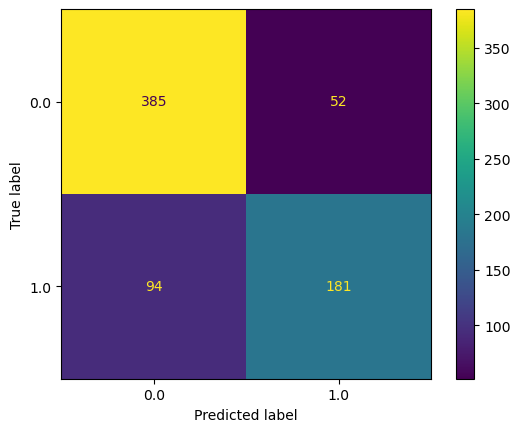

In [48]:
plot_confusion_matrix(logistic_model,x_train,y_train)
plt.show()

### ROC curve :

In [57]:
y_preds = logistic_model.predict_proba(x_train)
y_preds[:,1]

fpr,tpr,thresh = roc_curve(y_train,y_preds[:,1])

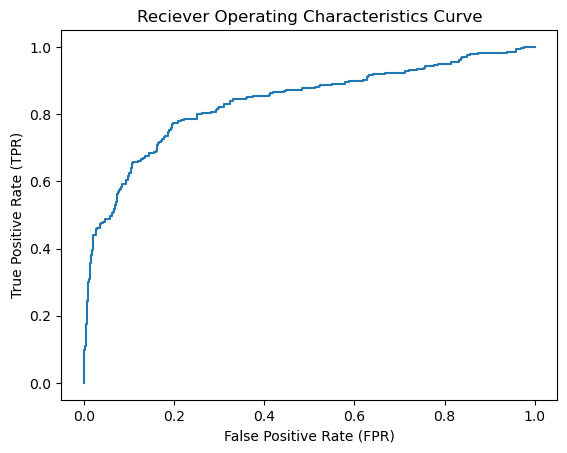

In [61]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Reciever Operating Characteristics Curve")
plt.show()

In [76]:
thresh = np.arange(0.1,1,0.1)

df_1 = pd.DataFrame()
for i in thresh :
    
    y_preds = ((logistic_model.predict_proba(x_train)>=i)[:,1]).astype(int)
    
    df_2 = pd.DataFrame(data = [accuracy_score(y_train,y_preds),recall_score(y_train,y_preds),precision_score(y_train,y_preds),f1_score(y_train,y_preds)],
                       index=["Acuracy","Recall","Precesion","F-1 Score"])
    
    df_1=pd.concat([df_1,df_2],axis=1)
    
df_1.columns=thresh
df_1

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Acuracy,0.436798,0.723315,0.779494,0.785112,0.794944,0.782303,0.765449,0.712079,0.672753
Recall,0.981818,0.843636,0.785455,0.716364,0.658182,0.552727,0.425455,0.269091,0.160000
Precesion,0.405405,0.601036,0.687898,0.724265,0.776824,0.826087,0.928571,0.948718,0.956522
F-1 Score,0.573858,0.701967,0.733447,0.720293,0.712598,0.662309,0.583541,0.419263,0.274143


# create pickle and json file :

In [77]:
with open("titanic.pkl","wb") as m :
    pickle.dump(logistic_model,m)

In [78]:
gender_values

{'male': 1, 'female': 0}

In [81]:
columns = list(x.columns)


In [82]:
json_dict = {"Gender_Value" :gender_values,"Columns" : columns}

In [84]:
with open("titanic.json","w") as j :
    json.dump(json_dict,j)

In [86]:
# Testing For single user input

df.head(1).T

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Gender,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [96]:

PassengerId = 1000
Pclass = 3
Gender = "male"
Age = 22.0
SibSp = 1
Parch = 0
Ticket = "A/5 21171"
Fare = 7.25
Embarked = "S"

In [97]:
test_array = np.zeros(len(json_dict["Columns"]),int)
test_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
test_array[0] = PassengerId 
test_array[1] = Pclass
test_array[2] = gender_values[Gender]
test_array[3] = Age
test_array[4] = SibSp
test_array[6] = Parch
test_array[7] = Fare

if Ticket in json_dict["Columns"]:
    ticket_index = json_dict["Columns"].index("Ticket_"+Ticket)
else:
    Ticket = "unique_ticket"
    ticket_index = json_dict["Columns"].index("Ticket_"+Ticket)
    
test_array[ticket_index] = 1

embark_index = json_dict["Columns"].index("Embarked_"+Embarked)
test_array[embark_index] = 1

In [99]:
test_array

array([1000,    3,    1,   22,    1,    0,    0,    7,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    1])

In [100]:
result = logistic_model.predict([test_array])
if PassengerId>=1 and PassengerId<=890:
    if result == 1:
        print("The Peroson is survived")
    else:
        print("person is not survived")
else:
    print("The id of person does not belongs to titanic Passager plz re-chcek it")

The id of person does not belongs to titanic Passager plz re-chcek it
